# Problem set P02C
import the packages

In [42]:
from IPython.display import Image
import sys
import numpy as np
sys.path.append("code")
from haar import *

## Exercise 1 
Define the haar caracteristics using the haar library

In [43]:
haar_1 = [ {"op": "add", "topleft_row_rel": 0.0, "topleft_col_rel": 0.0, "height_rel": 0.5, "width_rel": 1.0},
           {"op": "sub", "topleft_row_rel": 0.5, "topleft_col_rel": 0.0, "height_rel": 0.5, "width_rel": 1.0}]

haar_2 = [{"op": "add", "topleft_row_rel": 0.0, "topleft_col_rel": 0.0, "height_rel": 1.0, "width_rel": 0.5},
          {"op": "sub", "topleft_row_rel": 0.0, "topleft_col_rel": 0.5, "height_rel": 1.0, "width_rel": 0.5}]

haar_3 = [ {"op": "add", "topleft_row_rel": 0.0,   "topleft_col_rel": 0.0, "height_rel": 0.3, "width_rel": 1.0},
           {"op": "add", "topleft_row_rel": 0.7,   "topleft_col_rel": 0.0, "height_rel": 0.3, "width_rel": 1.0},
           {"op": "sub", "topleft_row_rel": 0.3,   "topleft_col_rel": 0.0, "height_rel": 0.4, "width_rel": 1.0}]

haar_4 = [ {"op": "add", "topleft_row_rel": 0.0,   "topleft_col_rel": 0.0, "height_rel": 1.0, "width_rel": 0.3},
           {"op": "add", "topleft_row_rel": 0.0,   "topleft_col_rel": 0.7, "height_rel": 1.0, "width_rel": 0.3},
           {"op": "sub", "topleft_row_rel": 0.0,   "topleft_col_rel": 0.3, "height_rel": 1.0, "width_rel": 0.4}]

haar_5 = [ {"op": "add", "topleft_row_rel": 0.0,   "topleft_col_rel": 0.0, "height_rel": 0.5, "width_rel": 0.5},
           {"op": "add", "topleft_row_rel": 0.5,   "topleft_col_rel": 0.5, "height_rel": 0.5, "width_rel": 0.5},
           {"op": "sub", "topleft_row_rel": 0.0,   "topleft_col_rel": 0.5, "height_rel": 0.5, "width_rel": 0.5},
           {"op": "sub", "topleft_row_rel": 0.5,   "topleft_col_rel": 0.0, "height_rel": 0.5, "width_rel": 0.5}]

haar_features = [haar_1, haar_2, haar_3, haar_4, haar_5 ]

In [44]:
M = create_sample_matrix(10)

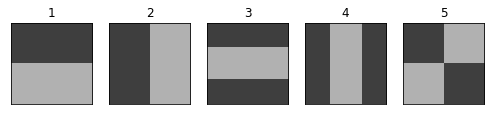

In [45]:
#Dont work???
show_haar_features(haar_features)

In [46]:
print (M)
print (extract_haar(haar_1, M))
print (extract_haar(haar_2, M))
print (extract_haar(haar_3, M))
print (extract_haar(haar_4, M))
print (extract_haar(haar_5, M))

[[ 1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4  4  4]
 [ 5  7  5  5  5  5  5  5  5  5]
 [ 6  6  6  6  6  6  6  6  6  6]
 [ 7  7  7  7  7  7  7  7  7  7]
 [ 8  8  8  8  8  8  8  8  8  8]
 [ 9  9  9  9  9  9  9  9  9  9]
 [10 10 10 10 10 10 10 10 10 10]]
-248
2
108
112
2


## Exercise 2
Do a funton to get the sum of the submatrix of a integral matrix

In [47]:
def get_submatrix_sum_using_integral(image, integral, topleft_row, topleft_col, height, width):
    a = integral[topleft_row-1,topleft_col-1] if topleft_row-1 >=0 and topleft_col-1>=0 else 0
    b = integral[topleft_row-1,topleft_col+width-1] if topleft_row-1>=0 and topleft_col+width-1>=0 else 0
    c = integral[topleft_row+height-1,topleft_col+width-1] if topleft_row+height-1>=0 and topleft_col+width-1>=0 else 0
    d = integral[topleft_row+height-1,topleft_col-1] if topleft_row+height-1>=0 and topleft_col-1>=0 else 0
    result = a+c-b-d
    return result

and prove the funtion

In [48]:
M = create_sample_matrix(10)
Mi = get_integral(M)
print (M)
print (Mi)

print (get_submatrix_sum_using_integral(M, Mi, 1,2,4,6))
print (np.sum(M[1:5,2:8]))
print (get_submatrix_sum_using_integral(M, Mi, 0,4,1,3))
print (np.sum(M[0:1,4:7]))
print (get_submatrix_sum_using_integral(M, Mi, 1,6,4,3))
print (np.sum(M[1:5,6:9]))
print (get_submatrix_sum_using_integral(M, Mi, 0,0,3,1))
print (np.sum(M[0:3,0:1]))

print (extract_haar(haar_1, M, M))
print (extract_haar(haar_1, M, Mi, submatrix_sum_function=get_submatrix_sum_using_integral))

[[ 1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4  4  4]
 [ 5  7  5  5  5  5  5  5  5  5]
 [ 6  6  6  6  6  6  6  6  6  6]
 [ 7  7  7  7  7  7  7  7  7  7]
 [ 8  8  8  8  8  8  8  8  8  8]
 [ 9  9  9  9  9  9  9  9  9  9]
 [10 10 10 10 10 10 10 10 10 10]]
[[  1   2   3   4   5   6   7   8   9  10]
 [  3   6   9  12  15  18  21  24  27  30]
 [  6  12  18  24  30  36  42  48  54  60]
 [ 10  20  30  40  50  60  70  80  90 100]
 [ 15  32  47  62  77  92 107 122 137 152]
 [ 21  44  65  86 107 128 149 170 191 212]
 [ 28  58  86 114 142 170 198 226 254 282]
 [ 36  74 110 146 182 218 254 290 326 362]
 [ 45  92 137 182 227 272 317 362 407 452]
 [ 55 112 167 222 277 332 387 442 497 552]]
84
84
3
3
42
42
6
6
-248
-248


We look how is mush faster

In [49]:
M = create_sample_matrix(300)
Mi = get_integral(M)
%timeit extract_haar(haar_1, M, Mi)
%timeit extract_haar(haar_1, M, Mi, submatrix_sum_function=get_submatrix_sum_using_integral)

150 µs ± 3.71 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
23 µs ± 1.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Exercise 3 
Make a function that return a matrix in each row have the haar caracteristics of the digit of the original matrix

In [50]:
def make_haar_dataset_for_MNIST(haar_features, d, N):
    M  = d[0].reshape(28,28)
    Mi = get_integral(M)
    num_feats = len(get_haar_features(haar_features, M, Mi, nb_scales=N, nb_shifts=N))
    print ("number of haar features", num_feats)
    d_haar = np.zeros((d.shape[0], num_feats))
    for i in range(d.shape[0]):
        if i%(d.shape[0]/20)==0:
            print ("{0:2.0f}% completed".format(i*1./d.shape[0] * 100))
            
        M  = d[i].reshape(28,28)
        Mi = get_integral(M)
        res = get_haar_features(haar_features, M, Mi, nb_scales=N, nb_shifts=N)
        d_haar[i] = res             
    return d_haar

Charge the data 

In [51]:
mnist = np.loadtxt("data.csv", delimiter=",")
d=mnist[:,1:785]
c=mnist[:,0]

And prove the code

In [52]:
haar_features = [ haar_1, haar_2 ]
d_haar = make_haar_dataset_for_MNIST(haar_features, d, 6)
print ("haar dataset size", d_haar.shape)
print ("checksum", np.sum(d_haar))

number of haar features 200
 0% completed
 5% completed
10% completed
15% completed
20% completed
25% completed
30% completed
35% completed
40% completed
45% completed
50% completed
55% completed
60% completed
65% completed
70% completed
75% completed
80% completed
85% completed
90% completed
95% completed
haar dataset size (1500, 200)
checksum -473660366.0


## End
### Thanks